<a href="https://colab.research.google.com/github/Sptfff/ADA-Informes/blob/main/Informe3_Problema_del_sub_arreglo_m%C3%A1ximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Descripción del problema

**Entrada**: Arreglo númerico de tamaño *n*: $[a_1,a_2,...,a_n]$.

**Salida**: Suma del sub-arreglo máximo, e índices del sub-arreglo.

El problema del sub-arreglo máximo consiste en encontrar la suma más larga dentro de un arreglo *A*, "separando" estos elementos del arreglo, en un sub-arreglo contiguo al arreglo original.

![image](https://imgur.com/wsfCDkA.jpg)

![image](https://imgur.com/7EKTUgM.jpg)

Aunque este problema a primera vista no pareciera tener una aplicación del todo practica, definitivamente la tiene, ya que es sumamente necesaria a la hora de análisis de dato, como puede ser en las inteligencias artificiales que procesan imagenes, donde haciendo conversión de ciertos datos, se puede analizar que zonas de las imagenes es más brillante que otra, lo que puede generar un mapa de profundidad de la imagen.
Tambien llega a tener usos en la biologia como es en el analisis de secuencias de genomas.

#2. Algoritmo para el sub-arreglo máximo

##2.1 Descripción del Algoritmo

En este caso para "solucionar" el problema del sub-arreglo máximo, haremos uso de la *MaxSubArray*, la cual tendrá un enfoque de "Divide y venceras", similar al que ocupan otros algoritmos como *MergeSort*.

Por lo que opera el arreglo original en 2 sub-arreglos de menor tamaño en comparación al original. 

El tiempo de ejecución de este algortimo corresponde a *O(NLog(n))*, debido a la funcion MaxSubArray, que al ser recursiva y dividir el arreglo en 2, obtiene como tiempo de ejecución *O(Log(n))*, además de la funcion MaxCrossingSum que al ser lineal tiene tiempo de ejecución *O(n)*. Y como el algoritmo ejecuta estas 2 funciones, el tiempo de ejecución total resulta ser *O(NLog(n))*.

#3. Código

In [ ]:
import random
from termcolor import colored
import copy

def maxCrossingSum(arr, i, mid, j, indices):
	suma = 0
	suma_izquierda = -10000

	for z in range(mid, i-1, -1):
		suma = suma + arr[z]
		if (suma > suma_izquierda):
			suma_izquierda = suma
	
	suma = 0
	suma_derecha= -1000
	indices[2] = mid
	
	for z in range(mid, j + 1):
		suma = suma + arr[z]
		if (suma > suma_derecha):
			suma_derecha = suma
	
	return max(suma_izquierda + suma_derecha - arr[mid], suma_izquierda, suma_derecha)


def maxSubArray(arr, i, j, indices):
	indices[0] = i
	indices[1] = j
	if (i > j):
		return -10000;
	if (i == j):
		return arr[i];
	mid = (i+j) // 2;
	
	return max(maxSubArray(arr, i, mid-1, indices), maxSubArray(arr, mid+1, j, indices), maxCrossingSum(arr, i, mid, j, indices))

arr = [12, 11, 13, 6, 81, 9, 15, 23]
largo = random.randint(3, 20)
arr = random.sample(range(-100, 100), largo)
n = len(arr)
print(colored(f"\nEl arreglo entregado es: {arr}\n", "magenta"))
indices = [0, 0, 0] 
max_sum = maxSubArray(arr, 0, n-1, indices)


print(colored(f"La suma del sub-arreglo máximo es: {max_sum}", "magenta"))
print(colored(f"\nIndice i: {indices[0]}", "blue"))
print(colored(f"Indice j: {indices[1]}", "blue"))
print(colored(f"Indice mid: {indices[2]}", "blue"))




El arreglo entregado es: [98, -22, -92, 86, 42, 59, 43, 36, -98, -9, 6, -7, -95, 80, -97, -72, 10]

La suma del sub-arreglo máximo es: 266

Indice i: 16
Indice j: 16
Indice mid: 8


#4. Correctitud

##Correctitud función MaxCrossingSum
###Teorema:

La función maxCrossingSum retorna la suma de los valores del subarreglo que contiene el valor del medio.

###Prueba del teorema:

La función maxCrossingSum recibe como parámetro un arreglo, para comprobar que realiza corretamente el proceso de suma de los valores del subarreglo, observaremos dos casos:

Si el valor de la mitad de arreglo es negativo: En esa situación se puede afirmar que no hay un subarreglo que contenga el valor ubicado en la mitad del arreglo original, por lo tanto se retorna un 0.

Si el valor de la mitad de arreglo es positivo: En este caso, se procede con la suma de los valores desde n/2 hasta 0 o hasta toparse con un número negativo, luego, con los valores de n/2+1 hasta el largo del arreglo, ambos valores forman parte de un subarreglo válido que contiene el valor medio, por lo tanto la suma de ambos, sigue siendo un subarreglo válido y representa la suma del máximo subarreglo que contiene el valor del medio.

##Correctitud función MaxSubArray
###Teorema:

La función MaxSubArray en base a un arreglo que recibe como parámetro, devuelve el subarreglo que contenga la mayor suma de sus elementos continuos.

##Prueba del teorema:

###Caso base: 
Si el arreglo recibido tiene un solo elemento, devuelve este ya que es el mayor.

###Caso general: 
Se asume que la función es correcta para arreglos de cualquier tamaño, la función divide en dos el arreglo original, buscando el máximo subarreglo de cada mitad de forma recursiva, para luego comparar ambos resultados con el que nos entrega la función maxCrossingSum, la cual ya probamos su correctitud.

#5. Experimentación

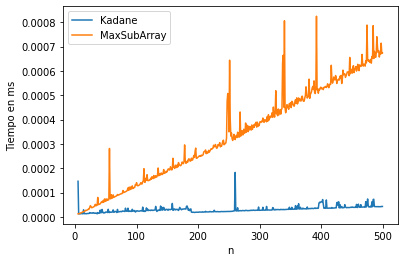

In [26]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat


def kadane(a):
  maxSum = 0
  maxHere = 0
  for i in range(0, len(a)):
    maxHere += i
    if maxHere < 0:
      maxHere = 0
    if maxSum < maxHere:
      maxSum = maxHere
  return maxSum

def maxCrossingSum2(arr, i, mid, j, indices):
	suma = 0
	suma_izquierda = -10000

	for z in range(mid, i-1, -1):
		suma = suma + arr[z]
		if (suma > suma_izquierda):
			suma_izquierda = suma
	
	suma = 0
	suma_derecha= -1000
	indices[2] = mid
	
	for z in range(mid, j + 1):
		suma = suma + arr[z]
		if (suma > suma_derecha):
			suma_derecha = suma
	
	return max(suma_izquierda + suma_derecha - arr[mid], suma_izquierda, suma_derecha)


def maxSubArray2(arr, i = 0, j = 0, indices = [0,0,0,0]):
    indices[0] = i
    j = len(arr)-1
    
    indices[1] = j
    if (i > j):
      return -10000;
    if (i == j):
      return arr[i];
    mid = (i+j) // 2;
    indices[3] += 1
    if (indices[3] >= 25):
      return 0
    
    return max(maxSubArray2(arr, i, mid-1, indices), maxSubArray2(arr, mid+1, j, indices), maxCrossingSum2(arr, i, mid, j, indices))


y1 = []
x=[]; y=[]
x1 = []

for n in range(5,500):
  indices = [0,0,0,0]
  i = 0
  j = n - 1
  a = random.sample(range(1, 1000), n)
  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import maxSubArray2", stmt=f"maxSubArray2({a})", repeat=1, number=10)

  x.append(n)
  y.append(t)

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)

  x1.append(n)
  y1.append(t)

plt.plot(x,y)
plt.plot(x1,y1)
plt.legend(["Kadane", "MaxSubArray"])
plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()